**The Libraries**

The algorithms library

In [154]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [155]:
import pandas as pd
import numpy as np

Visualization Libraries

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

Feature Selection and Data Preprocessing

In [157]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder 

Model Evaluation

In [158]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve
from sklearn.metrics import classification_report

In [159]:
from sklearn.model_selection import train_test_split ,StratifiedKFold, cross_val_score# to split the data into training and testing sets
from sklearn.model_selection import GridSearchCV # to find the best hyperparameters
import time # to time the GridSearchCV
from sklearn.datasets import make_classification # to create a random dataset

**Readign the Data**

In [160]:
data = pd.read_csv("D:\The_Final_Machine_Learning_Dataset.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_44240\2706168951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancer_stage', data=data, palette='cool')


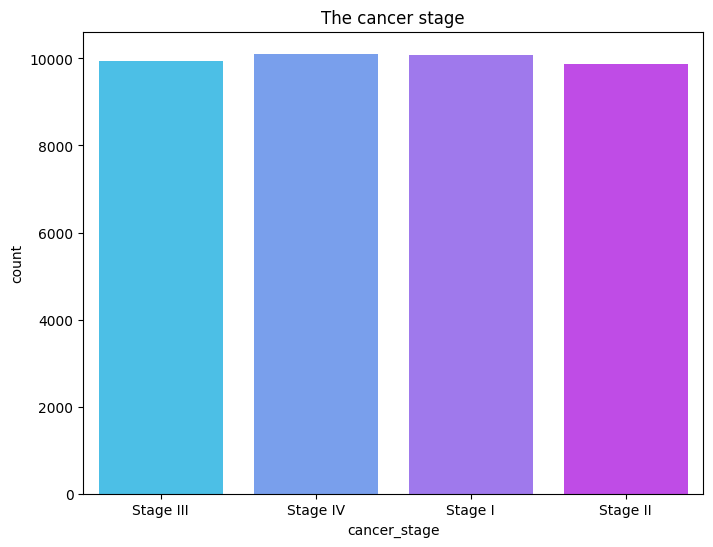

In [161]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cancer_stage', data=data, palette='cool')
plt.title("The cancer stage")
plt.show()

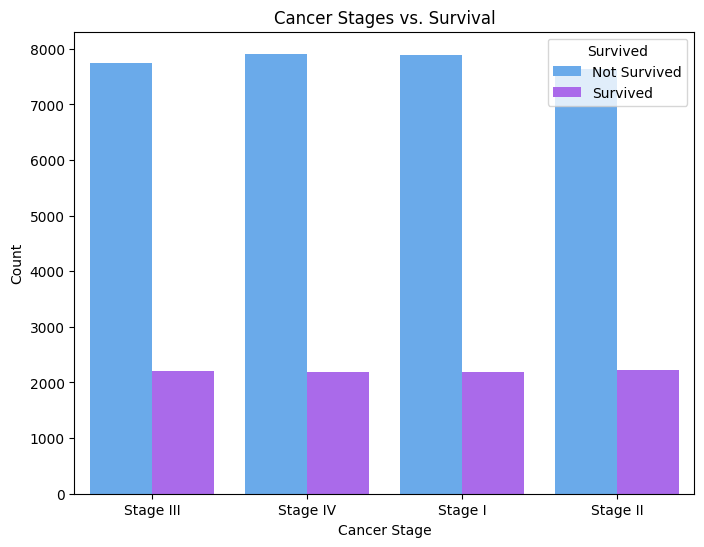

In [162]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cancer_stage', hue='survived', data=data, palette='cool')
plt.title("Cancer Stages vs. Survival")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

[]

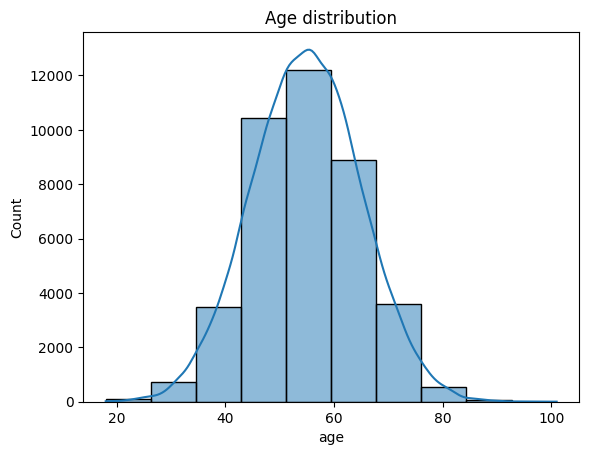

In [163]:
sns.histplot(data['age'] , bins = 10 , kde = True)
plt.title('Age distribution')
plt.plot()

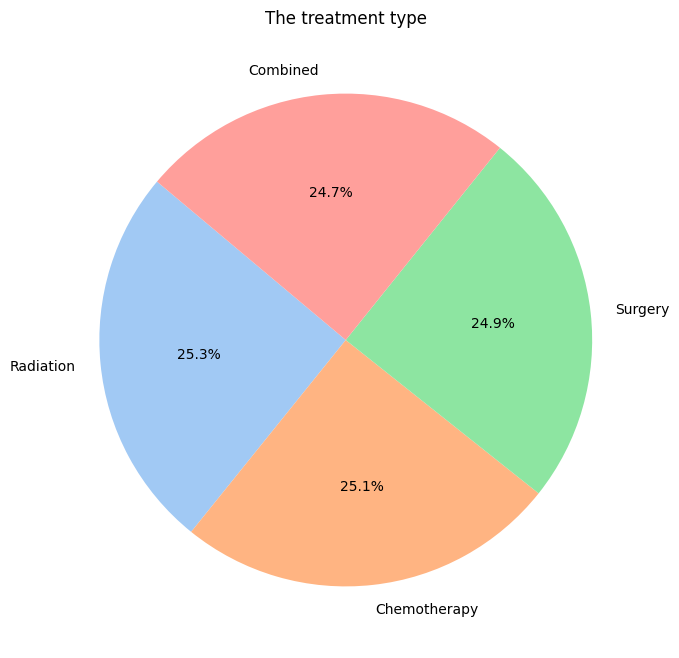

In [164]:
treatment_type_counts = data['treatment_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(treatment_type_counts, labels=treatment_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("The treatment type")
plt.show()

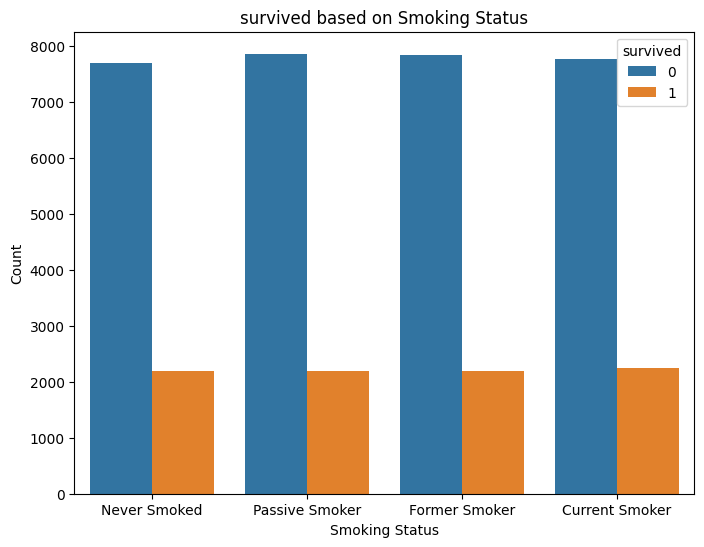

In [165]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='smoking_status', hue='survived')
plt.title('survived based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [166]:
data.duplicated().sum()

0

In [167]:
data.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [168]:
country_survival_rates = data.groupby('country')['survived'].mean()
country_survival_rates.sort_values(ascending=False)

country
Austria           0.240541
Belgium           0.239837
Croatia           0.238157
Bulgaria          0.236552
Portugal          0.234375
Czech Republic    0.233154
Sweden            0.229885
Ireland           0.228454
Italy             0.225529
Netherlands       0.223861
Slovakia          0.223433
Germany           0.223056
France            0.220351
Greece            0.216968
Cyprus            0.216678
Malta             0.215082
Latvia            0.214678
Denmark           0.213947
Hungary           0.213699
Luxembourg        0.211398
Finland           0.209893
Romania           0.208874
Lithuania         0.207907
Slovenia          0.207687
Poland            0.207535
Spain             0.206585
Estonia           0.205920
Name: survived, dtype: float64

**Transforming the data from object to integer**

In [170]:
label_encoder = LabelEncoder()
columns_to_label_encode = ['family_history','cancer_stage', 'gender',  'smoking_status','treatment_type']
for col in columns_to_label_encode:
    data[col] = label_encoder.fit_transform(data[col])

In [171]:
data = data.drop(columns=['id', 'country'])

In [172]:
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])
data['beginning_of_treatment_date'] = pd.to_datetime(data['beginning_of_treatment_date'])
data['treatment_delay_days'] = (data['beginning_of_treatment_date'] - data['diagnosis_date']).dt.days
data = data.drop(columns=['diagnosis_date'])

In [173]:
data['beginning_of_treatment_date'] = pd.to_datetime(data['beginning_of_treatment_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])
data['treatment_duration_days'] = (data['end_treatment_date'] - data['beginning_of_treatment_date']).dt.days
data = data.drop(columns=['beginning_of_treatment_date', 'end_treatment_date'])


In [174]:
from sklearn.preprocessing import StandardScaler
N_C = ['age', 'bmi', 'cholesterol_level', 'treatment_delay_days', 'treatment_duration_days']
scaler = StandardScaler()
data[N_C] = scaler.fit_transform(data[N_C])

In [175]:
data.shape

(40000, 15)

In [176]:
data['survived'].value_counts()

survived
0    31182
1     8818
Name: count, dtype: int64

In [177]:
data.head(10)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_delay_days,treatment_duration_days
0,0.902787,0,2,0,2,0.074032,0.534477,1,1,0,0,1,0,0.639627,0.896623
1,-0.493354,1,2,1,3,-0.549491,-0.592728,1,0,0,0,2,0,0.076144,-0.651117
2,1.002511,1,3,0,2,-1.388850,-0.937791,0,0,0,0,3,0,-0.628209,1.807909
3,-0.393629,0,2,1,1,0.493712,0.350444,1,1,1,0,3,1,-0.487338,-0.166544
4,-1.789770,1,0,1,2,1.165199,0.649498,0,0,0,0,0,0,-1.050821,-1.135690
5,-0.493354,1,1,1,2,0.253895,1.523658,1,1,0,0,2,0,-0.205597,-0.181009
6,-0.593078,1,3,0,1,-0.045876,1.523658,1,1,0,1,0,0,-0.346468,-0.332890
7,-0.393629,0,1,1,1,1.656824,0.235423,1,0,0,0,1,0,-0.909950,1.041271
8,0.902787,0,0,1,3,-0.429583,-1.673926,1,0,0,0,3,0,0.217015,1.677725
9,0.104992,1,2,1,3,1.249135,1.201599,1,1,0,0,0,1,-1.050821,0.947250


**Using the undersample methode to balance the values of the target column**

In [178]:
data_1 = data[data['survived'] == 1]
data_0 = data[data['survived'] == 0]
data_0_undersampled = data_0.sample(frac=0.30, random_state=42)
data_balanced = pd.concat([data_1, data_0_undersampled])
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [179]:
data_balanced.dtypes

age                        float64
gender                       int32
cancer_stage                 int32
family_history               int32
smoking_status               int32
bmi                        float64
cholesterol_level          float64
hypertension                 int64
asthma                       int64
cirrhosis                    int64
other_cancer                 int64
treatment_type               int32
survived                     int64
treatment_delay_days       float64
treatment_duration_days    float64
dtype: object

In [180]:
data_balanced.head(10)

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_delay_days,treatment_duration_days
0,-0.493354,1,3,1,0,1.728769,0.718511,0,0,0,0,0,1,-1.050821,-0.954879
1,0.703338,1,0,0,2,0.313849,0.603490,1,1,0,0,0,0,2.611815,-0.173777
2,0.503889,1,3,1,2,-1.161024,-0.937791,1,0,0,0,0,1,-1.191692,0.310796
3,0.503889,1,1,1,1,-0.741345,-1.144829,0,1,0,0,2,1,1.625721,-0.484771
4,-0.593078,1,2,0,0,1.417007,0.649498,1,1,0,0,3,1,-0.064727,-0.209939
5,-0.393629,1,2,1,3,1.261126,1.293616,0,0,1,0,2,0,-0.205597,-0.282263
6,0.005268,0,2,0,1,1.476961,0.304435,1,0,0,0,0,1,-0.487338,0.397585
7,0.404165,1,3,1,1,-1.712603,-1.857959,0,0,1,0,3,0,-0.346468,0.296331
8,0.005268,1,2,0,1,0.505703,1.201599,1,1,0,1,2,1,-0.064727,0.180612
9,2.199203,1,2,1,0,0.002087,0.557481,1,0,0,0,2,1,0.639627,1.185920


In [181]:
data_balanced['survived'].value_counts()

survived
0    9355
1    8818
Name: count, dtype: int64

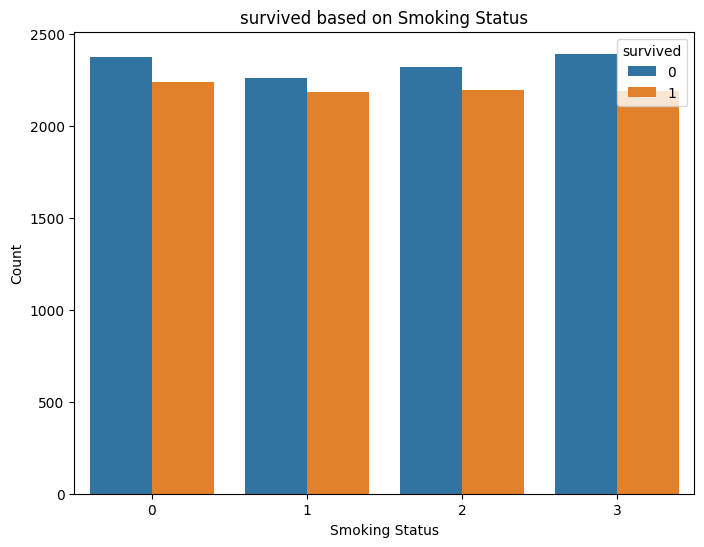

In [182]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x='smoking_status', hue='survived')
plt.title('survived based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

**Removing the unnessesary columns**

In [183]:
corr = data_balanced.corr()
print("correlation with survived:\n")
print(corr['survived'].sort_values(ascending=False))

correlation with survived:

survived                   1.000000
treatment_type             0.018704
cholesterol_level          0.007959
cirrhosis                  0.004641
cancer_stage               0.003100
gender                     0.002125
treatment_duration_days    0.002014
bmi                        0.000425
asthma                    -0.001304
age                       -0.003757
treatment_delay_days      -0.004328
hypertension              -0.005069
smoking_status            -0.006461
other_cancer              -0.008437
family_history            -0.009389
Name: survived, dtype: float64


<Axes: >

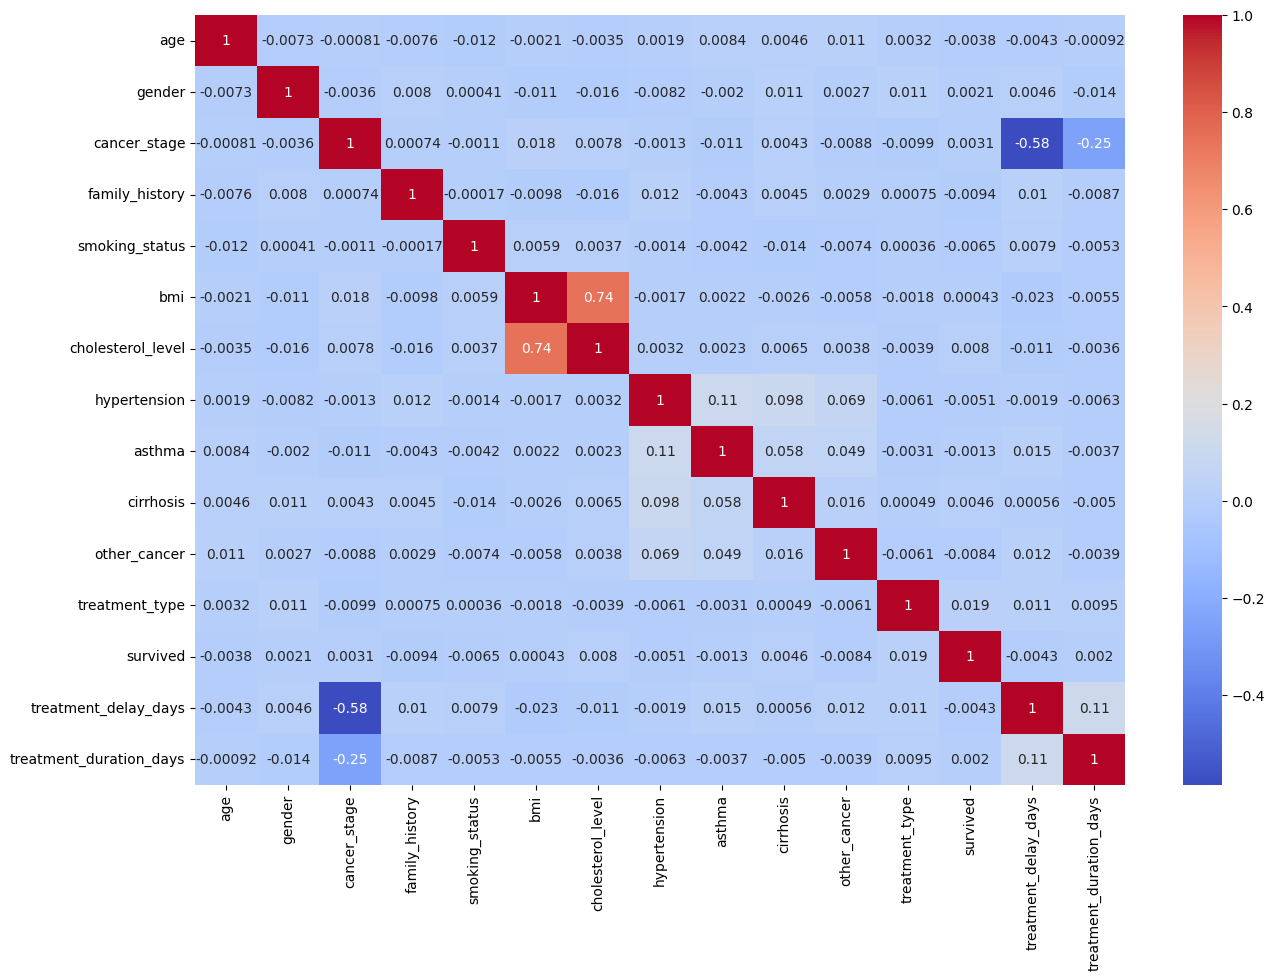

In [184]:
plt.figure(figsize = (15, 10))
sns.heatmap(data_balanced.corr(), annot = True, cmap = 'coolwarm')

**Spliting the data and finding the best features**

In [185]:
X = data_balanced.drop(columns=['survived'])
y = data_balanced['survived']

In [186]:
X = data_balanced.drop(columns=['survived'])
selector = SelectKBest(score_func=f_classif, k=12)
X_new = selector.fit_transform(X, y)

In [187]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'gender', 'cancer_stage', 'family_history', 'smoking_status',
       'cholesterol_level', 'hypertension', 'cirrhosis', 'other_cancer',
       'treatment_type', 'treatment_delay_days', 'treatment_duration_days'],
      dtype='object')


In [188]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [189]:
print("The Training:  ", X_train.shape, y_train.shape)
print("The validation:", X_val.shape, y_val.shape)
print("Thje testing: ", X_test.shape, y_test.shape)

The Training:   (12721, 14) (12721,)
The validation: (2726, 14) (2726,)
Thje testing:  (2726, 14) (2726,)


In [190]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [191]:
data_balanced['survived'].value_counts()

survived
0    9355
1    8818
Name: count, dtype: int64

In [192]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

**Measure the time for the training for each Model**

In [193]:
training_times = {}

*The measures without the GridSearchCV*

***Random Forest***

In [194]:
rf_params = [
    {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2},
    {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 5},
    {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10},
    {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2},
]

print("Random Forest Results:")
for params in rf_params:
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Params: {params}")
    print(classification_report(y_test, y_pred))

Random Forest Results:
Params: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.52      0.81      0.63      1404
           1       0.49      0.19      0.27      1322

    accuracy                           0.51      2726
   macro avg       0.50      0.50      0.45      2726
weighted avg       0.50      0.51      0.46      2726

Params: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.52      0.95      0.67      1404
           1       0.49      0.06      0.10      1322

    accuracy                           0.51      2726
   macro avg       0.50      0.50      0.38      2726
weighted avg       0.50      0.51      0.39      2726

Params: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.52      0.74      0.61      1404
  

In [195]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
training_times['Random Forest'] = end_time - start_time

***XGBoost***

In [196]:
xgb_params = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05},
    {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01}
]

print("\nGradient Boosting Results:")
for params in xgb_params:
    xgb = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    print(f"Params: {params}")
    print(classification_report(y_test, y_pred))


Gradient Boosting Results:
Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.52      0.68      0.59      1404
           1       0.50      0.33      0.40      1322

    accuracy                           0.51      2726
   macro avg       0.51      0.51      0.49      2726
weighted avg       0.51      0.51      0.50      2726



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Params: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}
              precision    recall  f1-score   support

           0       0.51      0.54      0.53      1404
           1       0.48      0.45      0.47      1322

    accuracy                           0.50      2726
   macro avg       0.50      0.50      0.50      2726
weighted avg       0.50      0.50      0.50      2726



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:09:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Params: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01}
              precision    recall  f1-score   support

           0       0.52      0.69      0.59      1404
           1       0.50      0.34      0.40      1322

    accuracy                           0.52      2726
   macro avg       0.51      0.51      0.50      2726
weighted avg       0.51      0.52      0.50      2726



In [197]:
xgb = XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False)
start_time = time.time()
xgb.fit(X_train, y_train)
end_time = time.time()
training_times['XGBoost'] = end_time - start_time

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


***K-Nearest Neighbors***

In [198]:
knn_params = [
    {'n_neighbors': 3, 'weights': 'uniform', 'p': 2},
    {'n_neighbors': 5, 'weights': 'distance', 'p': 1},
    {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}
]

print("\nKNN Results:")
for params in knn_params:
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Params: {params}")
    print(classification_report(y_test, y_pred))


KNN Results:
Params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1404
           1       0.48      0.49      0.48      1322

    accuracy                           0.49      2726
   macro avg       0.49      0.49      0.49      2726
weighted avg       0.49      0.49      0.49      2726

Params: {'n_neighbors': 5, 'weights': 'distance', 'p': 1}
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1404
           1       0.47      0.47      0.47      1322

    accuracy                           0.48      2726
   macro avg       0.48      0.48      0.48      2726
weighted avg       0.48      0.48      0.48      2726

Params: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1404
           1       0.47      0.47      0.47      13

In [199]:
knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
training_times['KNN'] = end_time - start_time

***Logistic Regression***

In [200]:
logreg_params = [
    {'penalty': 'l2', 'C': 1.0, 'solver': 'liblinear'},
    {'penalty': 'l1', 'C': 0.5, 'solver': 'liblinear'},
    {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs'}
]

print("Logistic Regression Results:")

for params in logreg_params:
    logreg = LogisticRegression(**params, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print(f"Params: {params}")
    print(classification_report(y_test, y_pred))

Logistic Regression Results:
Params: {'penalty': 'l2', 'C': 1.0, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.51      0.84      0.64      1404
           1       0.47      0.15      0.23      1322

    accuracy                           0.51      2726
   macro avg       0.49      0.50      0.43      2726
weighted avg       0.49      0.51      0.44      2726

Params: {'penalty': 'l1', 'C': 0.5, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.51      0.85      0.64      1404
           1       0.47      0.14      0.22      1322

    accuracy                           0.51      2726
   macro avg       0.49      0.50      0.43      2726
weighted avg       0.49      0.51      0.44      2726

Params: {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.51      0.84      0.64      1404
           1       0.47      0.15  

In [201]:
lr = LogisticRegression(max_iter=5000, random_state=42)
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
training_times['Logistic Regression'] = end_time - start_time

In [202]:
for model, train_time in training_times.items():
    print(f"{model} Training Time --> {train_time:.4f} sec")

Random Forest Training Time --> 1.4825 sec
XGBoost Training Time --> 0.0885 sec
KNN Training Time --> 0.0422 sec
Logistic Regression Training Time --> 0.0239 sec


# ***Grid Search CV***

In [203]:
results = {}

**Random Forest**

In [220]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, scoring='accuracy', cv=3, verbose=1, return_train_score=True)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
train_accuracy = accuracy_score(y_train, rf_grid.predict(X_train))
validation_accuracy = rf_grid.best_score_
test_accuracy = accuracy_score(y_test, y_pred_rf)
results['KNN'] = {
    'Best Params': rf_grid.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Training Accuracy': train_accuracy,
    'Validation': validation_accuracy,
    'Testing accuract': test_accuracy,
    'Report': classification_report(y_test, y_pred_rf)
}

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [206]:
print("Training and Validation Accuracy for Each Combination:")
for i, params in enumerate(rf_grid.cv_results_['params']):
    train_accuracy = rf_grid.cv_results_['mean_train_score'][i]
    validation_accuracy = rf_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {validation_accuracy:.4f}")
    print("-" * 40)
all_combinations = []
for i, params in enumerate(rf_grid.cv_results_['params']):
    rf_model = RandomForestClassifier(**params, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    all_combinations.append({
        'Params': params,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
    })
for combination in all_combinations:
    print(f"The Params: {combination['Params']}")
    print(f"The Accuracy: {combination['Accuracy']:.4f}")
    print(f"The Precision: {combination['Precision']:.4f}")
    print(f"The Recall: {combination['Recall']:.4f}")
    print(f"The F1-Score: {combination['F1-Score']:.4f}")
    print("-" * 40)
print("Best Params:", rf_grid.best_params_)

Training and Validation Accuracy for Each Combination:
Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Training Accuracy: 0.5288
Validation Accuracy: 0.5139
----------------------------------------
Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 0.5289
Validation Accuracy: 0.5140
----------------------------------------
Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 0.5292
Validation Accuracy: 0.5140
----------------------------------------
Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Training Accuracy: 0.5281
Validation Accuracy: 0.5133
----------------------------------------
Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy: 0.5285
Validation Accuracy: 0.5143
----------------------------------------
Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy: 0.5292
Validation Accuracy: 0.513

**Logistic Regression**

In [222]:
lr_params = {
    'penalty': ['l1', 'l2', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(lr, lr_params, scoring='accuracy', cv=3, verbose=1, return_train_score=True)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)
train_accuracy = accuracy_score(y_train, lr_best.predict(X_train))
validation_accuracy = lr_grid.best_score_
test_accuracy = accuracy_score(y_test, y_pred_lr)
results['KNN'] = {
    'Best Params': lr_grid.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Training Accuracy': train_accuracy,
    'Validation': validation_accuracy,
    'Testing accuract': test_accuracy,
    'Report': classification_report(y_test, y_pred_lr)
}


Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1186: U

In [ ]:
print("Training and Validation Accuracy for Each Combination:")
for i, params in enumerate(lr_grid.cv_results_['params']):
    train_accuracy = lr_grid.cv_results_['mean_train_score'][i]
    validation_accuracy = lr_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {validation_accuracy:.4f}")
    print("-" * 40)
all_combinations = []
for i, params in enumerate(lr_grid.cv_results_['params']):
    lr_model = LogisticRegression(**params, random_state=42)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    all_combinations.append({
        'Params': params,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
    })
for combination in all_combinations:
    print(f"The Params: {combination['Params']}")
    print(f"The Accuracy: {combination['Accuracy']:.4f}")
    print(f"The Precision: {combination['Precision']:.4f}")
    print(f"The Recall: {combination['Recall']:.4f}")
    print(f"The F1-Score: {combination['F1-Score']:.4f}")
    print("-" * 40)
print("Best Params:", lr_grid.best_params_)

**K-Nearest Neighbors**

In [209]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'seuclidean'],
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, scoring='accuracy', cv=3, verbose=1, return_train_score=True)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)
train_accuracy = accuracy_score(y_train, knn_best.predict(X_train))
validation_accuracy = knn_grid.best_score_
test_accuracy = accuracy_score(y_test, y_pred_knn)
results['KNN'] = {
    'Best Params': knn_grid.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Training Accuracy': train_accuracy,
    'Validation': validation_accuracy,
    'Testing accuract': test_accuracy,
    'Report': classification_report(y_test, y_pred_knn)
}

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
24 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

In [ ]:
print("Training and Validation Accuracy for Each Combination:")
for i, params in enumerate(knn_grid.cv_results_['params']):
    train_accuracy = knn_grid.cv_results_['mean_train_score'][i]
    validation_accuracy = knn_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {validation_accuracy:.4f}")
    print("-" * 40)
all_combinations = []
for i, params in enumerate(knn_grid.cv_results_['params']):
    knn_model = KNeighborsClassifier(**params)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    all_combinations.append({
        'Params': params,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
    })
for combination in all_combinations:
    print(f"The Params: {combination['Params']}")
    print(f"The Accuracy: {combination['Accuracy']:.4f}")
    print(f"The Precision: {combination['Precision']:.4f}")
    print(f"The Recall: {combination['Recall']:.4f}")
    print(f"The F1-Score: {combination['F1-Score']:.4f}")
    print("-" * 40)
print("Best Params:", knn_grid.best_params_)

**XGBoost**

In [210]:
xgb_params = {
    'n_estimators': [500, 800, 600],
    'max_depth': [3, 8, 10],
    'learning_rate': [0.01, 0.005, 0.001],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=3, verbose=1, return_train_score=True)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
train_accuracy = accuracy_score(y_train, xgb_best.predict(X_train))
validation_accuracy = xgb_grid.best_score_
test_accuracy = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = {
    'Best Params': xgb_grid.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Training Accuracy': train_accuracy,
    'Validation': validation_accuracy,
    'Testing accuract': test_accuracy,
    'Report': classification_report(y_test, y_pred_xgb)
}

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWar

In [132]:
print("Training and Validation Accuracy for Each Combination:")
for i, params in enumerate(xgb_grid.cv_results_['params']):
    train_accuracy = xgb_grid.cv_results_['mean_train_score'][i]
    validation_accuracy = xgb_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {validation_accuracy:.4f}")
    print("-" * 40)
all_combinations = []
for i, params in enumerate(xgb_grid.cv_results_['params']):
    xgb_model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    all_combinations.append({
        'Params': params,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
    })
for combination in all_combinations:
    print(f"The Params: {combination['Params']}")
    print(f"The Accuracy: {combination['Accuracy']:.4f}")
    print(f"The Precision: {combination['Precision']:.4f}")
    print(f"The Recall: {combination['Recall']:.4f}")
    print(f"The F1-Score: {combination['F1-Score']:.4f}")
    print("-" * 40)
print("Best Params:", xgb_grid.best_params_)

Training and Validation Accuracy for Each Combination:
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training Accuracy: 0.5965
Validation Accuracy: 0.5005
----------------------------------------
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Training Accuracy: 0.5797
Validation Accuracy: 0.4983
----------------------------------------
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.8}
Training Accuracy: 0.6180
Validation Accuracy: 0.4930
----------------------------------------
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 1.0}
Training Accuracy: 0.5983
Validation Accuracy: 0.4954
----------------------------------------
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.8}
Training Accuracy: 0.6067
Validation Accuracy: 0.4963
----------------------------------------
Params: {'learning_rate': 0.01, 'ma

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWar

The Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
The Accuracy: 0.5081
The Precision: 0.5012
The Recall: 0.5081
The F1-Score: 0.4755
----------------------------------------
The Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
The Accuracy: 0.5139
The Precision: 0.5085
The Recall: 0.5139
The F1-Score: 0.4755
----------------------------------------
The Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.8}
The Accuracy: 0.5110
The Precision: 0.5066
The Recall: 0.5110
The F1-Score: 0.4930
----------------------------------------
The Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 1.0}
The Accuracy: 0.5070
The Precision: 0.5014
The Recall: 0.5070
The F1-Score: 0.4853
----------------------------------------
The Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.8}
The Accuracy: 0.5110
The Precision: 0.5058
The Re

In [133]:
cb_params = {
    "iterations": [500, 300],
    "depth": [8, 10],
    "learning_rate": [0.03, 0.001],
    "auto_class_weights": ["SqrtBalanced", "Balanced"]
}

catboost_model = CatBoostClassifier(random_state=42)
cb_grid = GridSearchCV(catboost_model, cb_params, scoring='accuracy', cv=5, verbose=1)

catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
cb_grid.fit(X_train, y_train)
cb_best = cb_grid.best_estimator_
y_pred_rf = cb_best.predict(X_test)
results['Cat Boost'] = {
    'Best Params': cb_grid.best_params_,
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Report': classification_report(y_test, y_pred_rf)
}

Learning rate set to 0.030519
0:	learn: 0.6929447	total: 161ms	remaining: 2m 41s
1:	learn: 0.6927286	total: 169ms	remaining: 1m 24s
2:	learn: 0.6925112	total: 176ms	remaining: 58.6s
3:	learn: 0.6924068	total: 183ms	remaining: 45.6s
4:	learn: 0.6922313	total: 190ms	remaining: 37.8s
5:	learn: 0.6920135	total: 199ms	remaining: 33s
6:	learn: 0.6917986	total: 207ms	remaining: 29.3s
7:	learn: 0.6915849	total: 214ms	remaining: 26.6s
8:	learn: 0.6914052	total: 222ms	remaining: 24.4s
9:	learn: 0.6911528	total: 230ms	remaining: 22.7s
10:	learn: 0.6909882	total: 236ms	remaining: 21.2s
11:	learn: 0.6908698	total: 244ms	remaining: 20.1s
12:	learn: 0.6907020	total: 251ms	remaining: 19s
13:	learn: 0.6905570	total: 258ms	remaining: 18.2s
14:	learn: 0.6903987	total: 264ms	remaining: 17.4s
15:	learn: 0.6902367	total: 270ms	remaining: 16.6s
16:	learn: 0.6900961	total: 276ms	remaining: 16s
17:	learn: 0.6899832	total: 283ms	remaining: 15.4s
18:	learn: 0.6898784	total: 289ms	remaining: 14.9s
19:	learn: 0.68

In [224]:
for model, result in results.items():
    print(f"Model: {model}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Training Accuracy: {result['Training Accuracy']}")
    print(f"Validation Accuracy: {result['Validation']}")
    print(f"Test Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Report']}")
    print("-" * 50)

best_model = max(results, key=lambda k: results[k]['Accuracy'])
print(f"Best Model: {best_model} with Test Accuracy: {results[best_model]['Accuracy']}")

Model: KNN
Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.5147394072793019
Validation Accuracy: 0.5147394074614536
Test Accuracy: 0.5150403521643434
Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1404
           1       0.00      0.00      0.00      1322

    accuracy                           0.52      2726
   macro avg       0.26      0.50      0.34      2726
weighted avg       0.27      0.52      0.35      2726

--------------------------------------------------
Model: XGBoost
Best Params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training Accuracy: 0.5205565600188664
Validation Accuracy: 0.5127742396402889
Test Accuracy: 0.5117388114453412
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.68      1404
           1       0.29      0.00      0.01      1322

    

In [214]:
best_model = max(results, key=lambda k: results[k]['Accuracy'])
print(f"The best model is: {best_model}")

The best model is: XGBoost


In [215]:
from sklearn.utils import resample

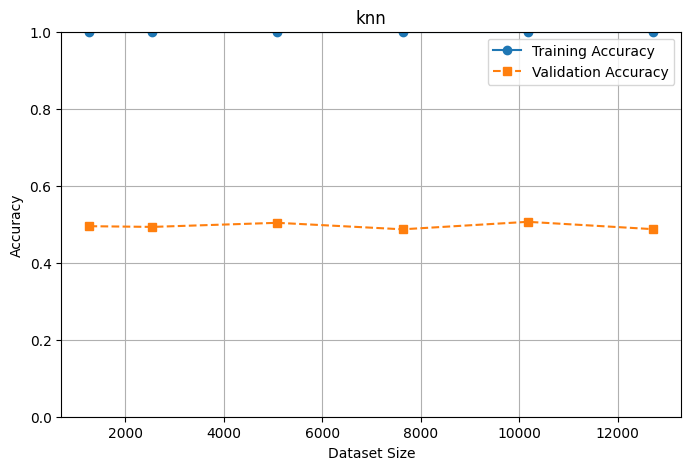

In [216]:
knn_best = knn_grid.best_estimator_
dataset_sizes = []
training_accuracies = []
validation_accuracies = []
for frac in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]: 
    X_train_subset, y_train_subset = resample(
        X_train, y_train, replace=False, n_samples=int(len(X_train) * frac), random_state=42
    )
    knn_best.fit(X_train_subset, y_train_subset)
    train_acc = accuracy_score(y_train_subset, knn_best.predict(X_train_subset))
    val_acc = accuracy_score(y_val, knn_best.predict(X_val))  
    dataset_sizes.append(len(X_train_subset))
    training_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, training_accuracies, marker="o", label="Training Accuracy")
plt.plot(dataset_sizes, validation_accuracies, marker="s", label="Validation Accuracy", linestyle="--")
plt.title("knn")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:08:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:08:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWar

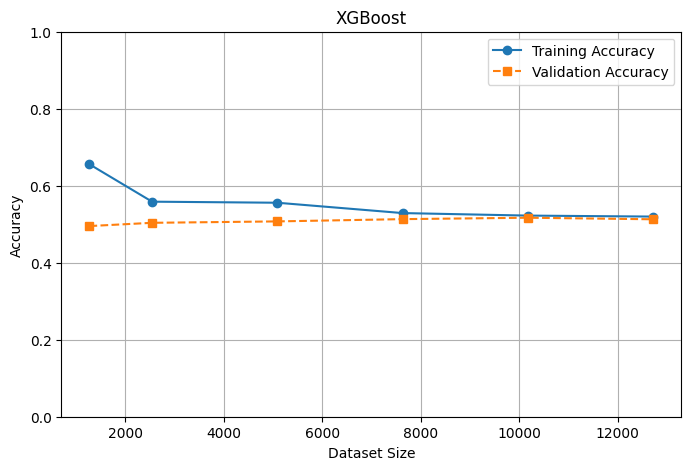

In [ ]:
xgb_best = xgb_grid.best_estimator_
dataset_sizes = []
training_accuracies = []
validation_accuracies = []
for frac in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]: 
    X_train_subset, y_train_subset = resample(
        X_train, y_train, replace=False, n_samples=int(len(X_train) * frac), random_state=42
    )
    xgb_best.fit(X_train_subset, y_train_subset)
    train_acc = accuracy_score(y_train_subset, xgb_best.predict(X_train_subset))
    val_acc = accuracy_score(y_val, xgb_best.predict(X_val))  
    dataset_sizes.append(len(X_train_subset))
    training_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, training_accuracies, marker="o", label="Training Accuracy")
plt.plot(dataset_sizes, validation_accuracies, marker="s", label="Validation Accuracy", linestyle="--")
plt.title("XGBoost")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

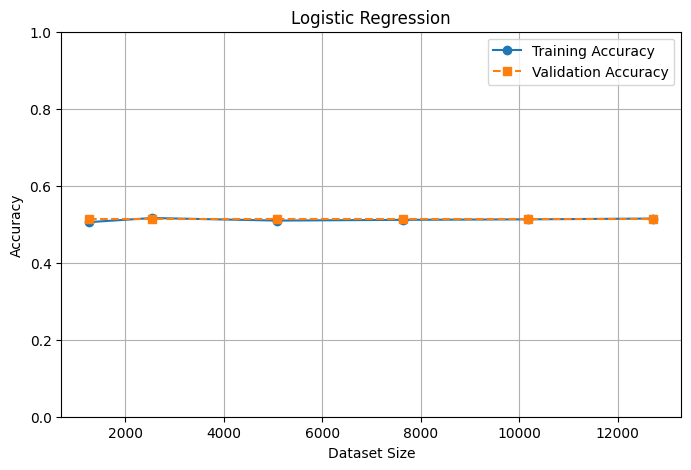

In [217]:
lr_best = lr_grid.best_estimator_
dataset_sizes = []
training_accuracies = []
validation_accuracies = []
for frac in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]: 
    X_train_subset, y_train_subset = resample(
        X_train, y_train, replace=False, n_samples=int(len(X_train) * frac), random_state=42
    )
    lr_best.fit(X_train_subset, y_train_subset)
    train_acc = accuracy_score(y_train_subset, lr_best.predict(X_train_subset))
    val_acc = accuracy_score(y_val, lr_best.predict(X_val))  
    dataset_sizes.append(len(X_train_subset))
    training_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, training_accuracies, marker="o", label="Training Accuracy")
plt.plot(dataset_sizes, validation_accuracies, marker="s", label="Validation Accuracy", linestyle="--")
plt.title("Logistic Regression")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

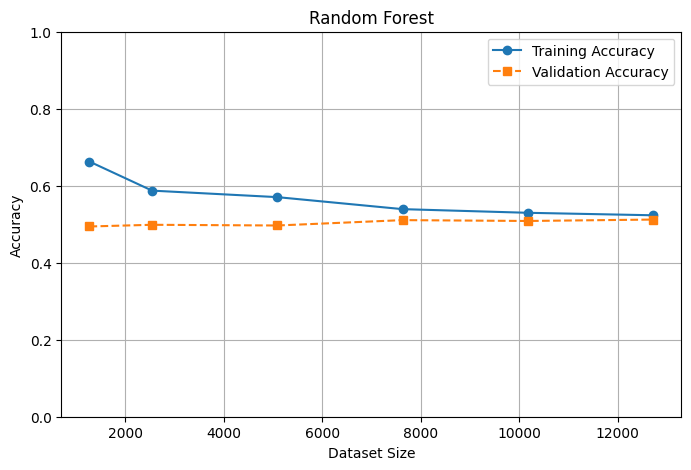

In [218]:
rf_best = rf_grid.best_estimator_
dataset_sizes = []
training_accuracies = []
validation_accuracies = []
for frac in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]: 
    X_train_subset, y_train_subset = resample(
        X_train, y_train, replace=False, n_samples=int(len(X_train) * frac), random_state=42
    )
    rf_best.fit(X_train_subset, y_train_subset)
    train_acc = accuracy_score(y_train_subset, rf_best.predict(X_train_subset))
    val_acc = accuracy_score(y_val, rf_best.predict(X_val))  
    dataset_sizes.append(len(X_train_subset))
    training_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, training_accuracies, marker="o", label="Training Accuracy")
plt.plot(dataset_sizes, validation_accuracies, marker="s", label="Validation Accuracy", linestyle="--")
plt.title("Random Forest")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()